# Data Pre Processing #

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import ast
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score



In [3]:
df1 = pd.read_csv("Combined/PR_audacity_combined.csv")
df2 = pd.read_csv("Combined/PR_jabref_combined.csv")
df3 = pd.read_csv("Combined/PR_powertoys_combined.csv")
df4 = pd.read_csv("Combined/PR_ant-design_combined.csv")
df5 = pd.read_csv("Combined/PR_bticoin_combined.csv")
df6 = pd.read_csv("Combined/PR_flutter_combined.csv")
df7 = pd.read_csv("Combined/PR_freeCodeCamp_combined.csv")
df8 = pd.read_csv("Combined/PR_langchain_combined.csv")
df9 = pd.read_csv("Combined/PR_mrdoob_combined.csv")
df10 = pd.read_csv("Combined/PR_node_combined.csv")
df11 = pd.read_csv("Combined/PR_playwright_combined.csv")
df12 = pd.read_csv("Combined/PR_pytorch_combined.csv")
df13 = pd.read_csv("Combined/PR_rust_combined.csv")
df14 = pd.read_csv("Combined/PR_swift_combined.csv")
df15 = pd.read_csv("Combined/PR_transformers_combined.csv")


df1['repo'] = 1
df2['repo'] = 2
df3['repo'] = 3
df4['repo'] = 4
df5['repo'] = 5
df6['repo'] = 6
df7['repo'] = 7
df8['repo'] = 8
df9['repo'] = 9
df10['repo'] = 10
df11['repo'] = 11
df12['repo'] = 12
df13['repo'] = 13
df14['repo'] = 14
df15['repo'] = 15

#combine all the data
df = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14, df15])

# Chcek date to ensure that it is unseen to LLM

In [4]:
#only use rows that have a created at date after 2024-07-18
df['created_at_check'] = pd.to_datetime(df['created_at'])
df = df[df['created_at_check'] > '2024-07-18']
df = df.drop(columns=['created_at_check'])


In [5]:
df.head()

,pr_number,created_at,merged_at,author,number_of_comments,number_of_review_comments,number_of_commits,lines_of_code_changed,number_of_files_changed,number_of_reviewers,...,number_of_reviews_requested,number_of_revisions,number_of_milestones,dependency_changes,comment_authors,issue_comments_text,reviews_text,issue_text,review_comments,repo
0,7308,2024-09-10T13:07:38Z,2024-09-10T13:49:46Z,igorkorsukov,0,0,1,9,2,1,...,0,1,0,False,[],NaN,NaN,NaN,NaN,1
1,7303,2024-09-10T12:15:27Z,2024-09-10T12:42:48Z,igorkorsukov,0,0,1,9,1,1,...,0,1,0,False,[],NaN,NaN,NaN,NaN,1
2,7301,2024-09-10T10:27:20Z,2024-09-10T13:13:54Z,grliszas14,0,0,2,40,1,1,...,0,2,0,False,[],NaN,NaN,Resolves: https://github.com/audacity/audacity...,NaN,1
3,7288,2024-09-09T13:13:46Z,2024-09-09T14:53:04Z,LWinterberg,0,0,1,12,3,1,...,0,1,0,False,[],NaN,NaN,NaN,NaN,1
4,7295,2024-09-10T08:53:37Z,2024-09-10T09:58:23Z,grliszas14,0,0,1,2,1,1,...,0,1,0,False,[],NaN,NaN,NaN,NaN,1


In [6]:
df.shape

(8169, 31)

In [7]:
#save to csv
#df.to_csv("Combined/PR_combined.csv.csv", index=False)

In [8]:
#reviews_text are also comments
# add the test from the two columns together

df['issue_comments_text'] = (
    df['issue_comments_text'].fillna('').astype(str) + 
    df['reviews_text'].fillna('').astype(str)
)
df.drop(columns=['reviews_text' ], inplace=True)


# Cleaning the data

In [9]:
# Importing libraries
import pandas as pd
#import emoji
import re
import string
import json
#import openai
import sklearn

# Initialize counters for text cleaning
cleaned_count = 0
original_count = 0

# Text cleaning function
def clean_text(text):
    global cleaned_count, original_count

    if not isinstance(text, str):
        original_count += 1
        return text

    # Remove double quotation marks
    text = text.replace('"', '')

    # Remove text starting with "DevTools" and ending with "(automated)"
    text = re.sub(r'DevTools.*?\(automated\)', '', text)

    # Lowercasing should be one of the first steps to ensure uniformity
    text = text.lower()

    # Remove emojis
    #text = emoji.demojize(text)

    # Remove URLs
    text = re.sub(r'https?://\S+|www\.\S+', '', text)

    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)

    # Remove special characters and punctuation
    text = re.sub(f"[{re.escape(string.punctuation)}]", '', text)

    # Remove '#' characters
    text = text.replace("#", "")

    # Remove consecutive whitespaces and replace with a single space
    text = re.sub(r'\s+', ' ', text)

    # Split the text into words
    words = text.split()

    # Remove words that are over 20 characters
    words = [word for word in words if len(word) <= 20]

    # Join the remaining words back into cleaned text
    cleaned_text = ' '.join(words)

    cleaned_count += 1
    return cleaned_text

#df['labels'] = df['labels'].apply(clean_text)



## Feature Extraction/ Generation


In [10]:
#if comment_author isnt empty list then set comments to 1 else 0
df['comments'] = df['comment_authors'].apply(lambda x: 0 if x.count("'")==0 else 1)

#if comment_author isnt empty then count teh number of apostrophes an d divide that by 2 to get the number of comments as an integer
df['comment_author_number'] = df['comment_authors'].apply(lambda x: 0 if pd.isnull(x) else int(x.count("'")/2))

#count words in issue comments text only if df[comments] ==1 else put 0
df['issue_text_wordiness'] = df['issue_text'].apply(lambda x: 0 if pd.isnull(x) else len(x.split())) 

In [11]:
#count words in issue comments text only if df[comments] ==1 else put 0
df['issue_text_wordiness'] = df['issue_text'].apply(lambda x: 0 if pd.isnull(x) else len(x.split())) 

In [12]:
#count words in issue comments text only if df[comments] ==1 else put 0
df['issue_comments_text_length'] = df['issue_comments_text'].apply(lambda x: 0 if pd.isnull(x) else len(x.split())) 

#now calcualte wordiness by dividing the number of words by the number of comments
df['issue_comments_text_wordiness'] = (df['issue_comments_text_length']/df['comment_author_number'])

#df.drop('issue_comments_text_length', inplace=True, axis=1)

In [13]:
# drop time_since_last_commit and test_coverage columns
df.drop(['time_since_last_commit', 'test_coverage','dependency_changes', 'number_of_linked_issues', 'number_of_milestones'], axis=1, inplace=True)

#divide review_duration and time to first reponse  by 3600 to get hours
df['review_duration'] = df['review_duration']/3600
df['time_to_first_response'] = df['time_to_first_response']/3600


In [14]:
#fill out the missing values with 0
df['time_to_first_response'] = df['time_to_first_response'].fillna(0)

#drop comment_authors column
df.drop(['comment_authors'], axis=1, inplace=True)


In [15]:
df['code_changes_ratio'] = df['lines_of_code_changed'] / df['number_of_files_changed']

#if code_changes_ratio is nan fill with 0
df['code_changes_ratio'] = df['code_changes_ratio'].fillna(0)


In [16]:
#create a copy of Data fram for LLM
df_llm = df.copy()


## Clean Labels

In [17]:
import pandas as pd

# List all the unique labels and account for each
labels_all = df['labels'].unique()

# Convert to DataFrame
labels_all = pd.DataFrame(labels_all, columns=['label'])

# Convert everything to lowercase
labels_all['label'] = labels_all['label'].str.lower()

# Remove unwanted characters
labels_all['label'] = labels_all['label'].str.replace(r'[\[\]"\']', '', regex=True)

# Drop empty labels after cleaning
labels_all = labels_all[labels_all['label'].str.strip() != '']

#remove right square brackets quotes
#labels_all = labels_all.apply(lambda x: x.str.replace('\,',','))

#Split labels that contain commas into separate entries
label_list = labels_all['label'].str.split(',\s*', expand=True).stack().reset_index(drop=True)

# Get unique values
unique_labels = label_list.unique().tolist()

# Print the unique list
#print(unique_labels)





<>:22: SyntaxWarning: invalid escape sequence '\s'
<>:22: SyntaxWarning: invalid escape sequence '\s'
/var/folders/8z/fy7_m7bd71552lpw8_st6mgr0000gn/T/ipykernel_19801/3489499994.py:22: SyntaxWarning: invalid escape sequence '\s'
  label_list = labels_all['label'].str.split(',\s*', expand=True).stack().reset_index(drop=True)


In [19]:
labels_df = pd.DataFrame(columns=unique_labels)
labels_df['Original_labels'] = df['labels'] 
for label in unique_labels:
    labels_df[label] = labels_df['Original_labels'].apply(lambda x: 1 if label in x else 0)

#add a row that sums teh count for each column 
labels_df.loc['Total'] = labels_df.sum()

#drop the original labels column
labels_df.drop('Original_labels', axis=1, inplace=True)

#drop all columns with a total less than 10
labels_df = labels_df.loc[:, (labels_df.sum(axis=0) > 10)]

#drop total row
labels_df = labels_df.drop(['Total'])

#count teh number of 1s in each row and call teh column label_count
labels_df['label_count'] = labels_df.sum(axis=1)

#add labels_df['label_count'] to df_llm
df_llm['label_count'] = labels_df['label_count']

#save to csv
labels_df.to_csv("PR_labels.csv", index=False)

#generate a new list with the columns that are left
#final_unique_labels = labels_df.columns.tolist()



/var/folders/8z/fy7_m7bd71552lpw8_st6mgr0000gn/T/ipykernel_19801/2081579911.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  labels_df['label_count'] = labels_df.sum(axis=1)


In [ ]:
#break

In [20]:
#concatenate labels_df to the original dataframe
df = pd.concat([df.reset_index(drop=True), labels_df.reset_index(drop=True)], axis=1)

#drop the labels column
df.drop(['labels'], axis=1, inplace=True)


In [21]:
df.shape

(8169, 183)

In [22]:


#print to csv
#df.to_csv("PR_ctester.csv", index=False)

In [23]:
df['created_at'] = pd.to_datetime(df['created_at'], format='%Y-%m-%dT%H:%M:%SZ', errors='coerce')
df['merged_at'] = pd.to_datetime(df['merged_at'], format='%Y-%m-%dT%H:%M:%SZ', errors='coerce')
df['Issue_Lifetime(hours)'] = (df['merged_at'] - df['created_at']).dt.total_seconds() / 3600


# Define the conditions for the 'Issue Lifetime' groups
conditions = [
    (df['Issue_Lifetime(hours)'] < 1),  # less than 1 hour - group 1
    (df['Issue_Lifetime(hours)'] >= 1) & (df['Issue_Lifetime(hours)'] < 24), # between 1 hour and 1 days - group 2
    (df['Issue_Lifetime(hours)'] >= 24) & (df['Issue_Lifetime(hours)'] < 168),  # between 1 day1 and a week - group 3
    (df['Issue_Lifetime(hours)'] >= 168) & (df['Issue_Lifetime(hours)'] < 5040),  # between  week and a month - group 4
    (df['Issue_Lifetime(hours)'] >= 5040)  # more than a month - group 5
]

# Define the corresponding group numbers
groups = [1, 2, 3, 4, 5]
group_dict={
    1: 'Less than 1 hour',
    2: 'Between 1 hour and 1 day',
    3: 'Between 1 day and a week',
    4: 'Between a week and a month',
    5: 'More than a month'
}

# Create the 'Issue Lifetime' column using np.select
df['Issue Lifetime'] = np.select(conditions, groups)

#add the issue lifetime to the df_llm
df_llm['Issue Lifetime'] = df['Issue Lifetime']


## Clean text

In [24]:
import re

def clean_review_comment(text):
    # If text is not a string (e.g. NaN), return an empty string
    if not isinstance(text, str):
        return ""
    
    # Remove code blocks (anything between triple backticks)
    text = re.sub(r'```[\s\S]*?```', ' ', text)
    # Remove inline code (anything between single backticks)
    text = re.sub(r'`[^`]*`', ' ', text)
    
    # Remove commit hashes (40-character hexadecimal strings)
    text = re.sub(r'\b[0-9a-f]{40}\b', ' ', text)
    
    # Remove URLs
    text = re.sub(r'https?://\S+', ' ', text)
    
    # Remove extra quotes (replace multiple quotes with a single quote)
    text = re.sub(r'"+', '"', text)
    
    # (Optional) Remove boilerplate phrases or common templates
    text = re.sub(r'(?im)^(Checklist:|Note:).*$', ' ', text)
    
    # Remove punctuation (if desired)
    text = re.sub(r'[^\w\s]', ' ', text)
    
    # Lowercase the text
    text = text.lower()
    
    # Keep only English words of length 2 or more
    tokens = re.findall(r'\b[A-Za-z]{2,}\b', text)
    
    # Join tokens back into a single cleaned string
    cleaned_text = ' '.join(tokens)
    
    return cleaned_text


df['review_comments']=df['review_comments'].apply(clean_review_comment)
df['issue_comments_text'] = df['issue_comments_text'].apply(clean_review_comment)
df['issue_text'] = df['issue_text'].apply(clean_review_comment)

#add the issue comments text to the df_llm
df_llm['issue_comments_text'] = df['issue_comments_text']

#add the issue text to the df_llm
df_llm['issue_text'] = df['issue_text']

#add the review comments to the df_llm
df_llm['review_comments'] = df['review_comments']



In [25]:
# print out 'issue_comments_text' to issue_comments_text.csv
# print out 'issue_text' to issue_text.csv
# print out review_comments to review_comments.csv

df['issue_comments_text'].to_csv('issue_comments_text.csv', index=False)
df['issue_text'].to_csv('issue_text.csv', index=False)
df['review_comments'].to_csv('review_comments.csv', index=False)


In [26]:
#break

# TFIDF

In [27]:
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from scipy.sparse import hstack, csr_matrix
import nltk

#nltk.download('punkt')  # ensure the tokenizer models are downloaded
#nltk.download('punkt_tab')

def nltk_tokenizer(text):
    return nltk.word_tokenize(text)


#create new dataframe
df_TFIDF = df[['issue_comments_text', 'issue_text', 'repo', 'Issue Lifetime', 'review_comments']].copy()

# Combine the issue text and comments text into a single column
df_TFIDF['all_text'] =  df_TFIDF['issue_text'] +' '+ df_TFIDF['issue_comments_text']

#df_TFIDF['issue_comments_text'] +' '+ df_TFIDF['review_comments']+ ' ' + 

#get the stem words in all_text
stemmer = PorterStemmer()
df_TFIDF['all_text'] = df_TFIDF['all_text'].apply(
    lambda x: ' '.join([stemmer.stem(word) for word in str(x).split()])
)

'''
# Create a TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=10000, tokenizer=nltk_tokenizer, token_pattern=None, stop_words='english', max_df=0.8,  min_df=0.2 )
tfidf.fit(df_TFIDF['all_text'])
text_tfidf = tfidf.transform(df_TFIDF['all_text'])

#  Convert the TF-IDF sparse matrix into a DataFrame.
#    Use the same index as df to ensure proper merging.
tfidf_df = pd.DataFrame(
    text_tfidf.toarray(), 
    columns=tfidf.get_feature_names_out(), 
    index=df.index
)


# 5. Merge the TF-IDF features back into the original df.
#    If you no longer need the raw text columns, you can drop them later.
#df = pd.concat([df, tfidf_df], axis=1)'''



"\n# Create a TF-IDF Vectorizer\ntfidf = TfidfVectorizer(max_features=10000, tokenizer=nltk_tokenizer, token_pattern=None, stop_words='english', max_df=0.8,  min_df=0.2 )\ntfidf.fit(df_TFIDF['all_text'])\ntext_tfidf = tfidf.transform(df_TFIDF['all_text'])\n\n#  Convert the TF-IDF sparse matrix into a DataFrame.\n#    Use the same index as df to ensure proper merging.\ntfidf_df = pd.DataFrame(\n    text_tfidf.toarray(), \n    columns=tfidf.get_feature_names_out(), \n    index=df.index\n)\n\n\n# 5. Merge the TF-IDF features back into the original df.\n#    If you no longer need the raw text columns, you can drop them later.\n#df = pd.concat([df, tfidf_df], axis=1)"

In [28]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer(max_features=1000, tokenizer=nltk_tokenizer, token_pattern=None, stop_words='english', max_df=0.8,  min_df=0.2)
count_vect.fit(df_TFIDF['all_text'])
text_count = count_vect.transform(df_TFIDF['all_text'])

# Convert to DataFrame
count_df = pd.DataFrame(
    text_count.toarray(), 
    columns=count_vect.get_feature_names_out(), 
    index=df.index
)

# Merge back into original dataframe
df = pd.concat([df.reset_index(drop=True), count_df.reset_index(drop=True)], axis=1)

#save to csv
df.to_csv("Combined/PR_combined1.csv", index=False)


In [29]:
df.shape

(8169, 242)

In [30]:
count_df

,add,addit,ani,approv,befor,branch,case,chang,check,checklist,...,summari,target,test,thank,thi,type,updat,use,wa,work
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8164,0,0,0,0,0,0,0,5,0,0,...,0,0,1,0,3,0,0,1,0,0
8165,2,0,0,0,0,0,0,1,2,0,...,0,0,0,0,5,0,1,0,0,0
8166,1,0,3,1,1,0,2,5,1,0,...,0,0,3,6,7,0,2,1,2,0
8167,1,0,1,1,1,0,2,2,1,0,...,0,0,2,2,3,0,1,1,1,0


# SBERT

In [31]:
#pip install sentence-transformers
from sentence_transformers import SentenceTransformer

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [32]:
# Initialize the SBERT model
'''sbert_model = SentenceTransformer('all-mpnet-base-v2')

df_TFIDF['text'] =  df_TFIDF['issue_text'] +' '+ df_TFIDF['issue_comments_text']

# Convert the "all_text" column to a list of strings
texts = df_TFIDF['text'].tolist()

# Compute embeddings for each document (each row)
# This returns a NumPy array of shape (num_documents, 384)
sbert_embeddings = sbert_model.encode(texts, show_progress_bar=True)

# Create a DataFrame for the SBERT embeddings; use the same index as your df_TFIDF
sbert_df = pd.DataFrame(sbert_embeddings, index=df_TFIDF.index)

# Optionally, name the columns (e.g., sbert_0, sbert_1, ..., sbert_383)
sbert_df.columns = [f'sbert_{i}' for i in range(sbert_df.shape[1])]'''



'sbert_model = SentenceTransformer(\'all-mpnet-base-v2\')\n\ndf_TFIDF[\'text\'] =  df_TFIDF[\'issue_text\'] +\' \'+ df_TFIDF[\'issue_comments_text\']\n\n# Convert the "all_text" column to a list of strings\ntexts = df_TFIDF[\'text\'].tolist()\n\n# Compute embeddings for each document (each row)\n# This returns a NumPy array of shape (num_documents, 384)\nsbert_embeddings = sbert_model.encode(texts, show_progress_bar=True)\n\n# Create a DataFrame for the SBERT embeddings; use the same index as your df_TFIDF\nsbert_df = pd.DataFrame(sbert_embeddings, index=df_TFIDF.index)\n\n# Optionally, name the columns (e.g., sbert_0, sbert_1, ..., sbert_383)\nsbert_df.columns = [f\'sbert_{i}\' for i in range(sbert_df.shape[1])]'

# Merge df

In [33]:
'''df = df.reset_index(drop=True)
tfidf_df = tfidf_df.reset_index(drop=True)
sbert_df_reset = sbert_df.reset_index(drop=True)

# Verify that all indices are unique and of equal length
print(df.index.is_unique, tfidf_df.index.is_unique, sbert_df_reset.index.is_unique)
print(len(df), len(tfidf_df), len(sbert_df_reset)) '''

'df = df.reset_index(drop=True)\ntfidf_df = tfidf_df.reset_index(drop=True)\nsbert_df_reset = sbert_df.reset_index(drop=True)\n\n# Verify that all indices are unique and of equal length\nprint(df.index.is_unique, tfidf_df.index.is_unique, sbert_df_reset.index.is_unique)\nprint(len(df), len(tfidf_df), len(sbert_df_reset)) '

In [34]:
#merge the sbert_df with the original dataframe
'''
##df.reset_index(drop=True, inplace=True)
#sbert_df_reset = sbert_df.reset_index(drop=True)
df = pd.concat([df, tfidf_df, sbert_df_reset], axis=1)'''




'\n##df.reset_index(drop=True, inplace=True)\n#sbert_df_reset = sbert_df.reset_index(drop=True)\ndf = pd.concat([df, tfidf_df, sbert_df_reset], axis=1)'

In [35]:
'''#tfidf_df column names
tfidf_df.columns

#print out the column names to a columns.txt file
with open('columns.txt', 'w') as f:
    for item in tfidf_df.columns:
        f.write("%s\n" % item) 
        
#print out df_TFIDF['all_text'] to a all_text.txt file
with open('all_text.txt', 'w') as f:
    for item in df_TFIDF['all_text']:
        f.write("%s\n" % item)
        '''

'#tfidf_df column names\ntfidf_df.columns\n\n#print out the column names to a columns.txt file\nwith open(\'columns.txt\', \'w\') as f:\n    for item in tfidf_df.columns:\n        f.write("%s\n" % item) \n        \n#print out df_TFIDF[\'all_text\'] to a all_text.txt file\nwith open(\'all_text.txt\', \'w\') as f:\n    for item in df_TFIDF[\'all_text\']:\n        f.write("%s\n" % item)\n        '

## Data Distribution ##

In [36]:
#print out teh columns
df.columns

Index(['pr_number', 'created_at', 'merged_at', 'author', 'number_of_comments',
       'number_of_review_comments', 'number_of_commits',
       'lines_of_code_changed', 'number_of_files_changed',
       'number_of_reviewers',
       ...
       'summari', 'target', 'test', 'thank', 'thi', 'type', 'updat', 'use',
       'wa', 'work'],
      dtype='object', length=242)

ValueError: operands could not be broadcast together with remapped shapes [original->remapped]: (5,)  and requested shape (4,)

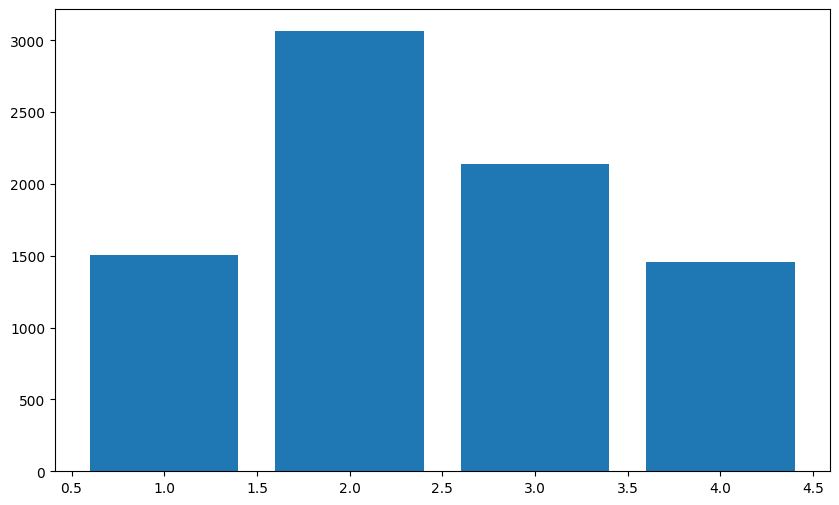

In [37]:
# Graphing the distribution of the groups
group_counts = df['Issue Lifetime'].value_counts().sort_index()

#if the group is empty then add it to the group counts and assign zero
#for i in range(1, 6):
    #if i not in group_counts.index:
       # group_counts.loc[i] = 0

plt.figure(figsize=(10, 6))
plt.bar(group_counts.index, group_counts.values, tick_label=['<1 hour','1 hours - 1 day', '1 days - 1 week', '1 week - 1 month','>1 month'])
plt.title('Distribution of Issue Lifetime Groups')
plt.xlabel('Issue Lifetime Groups')
plt.ylabel('Frequency')
plt.grid(True, axis='y')
plt.show()

# More Feature Extraction


In [38]:
import pandas as pd

# Ensure 'created_at' and 'merged_at' are in datetime format
df['created_at'] = pd.to_datetime(df['created_at'])
df['merged_at'] = pd.to_datetime(df['merged_at'])

# Calculate 'Issues Opened in Last 2 Weeks' for each row
df['Issues Opened in Last 2 Weeks'] = df.apply(
    lambda row: df[(df['created_at'] >= row['created_at'] - pd.Timedelta(days=14)) & 
                   (df['created_at'] < row['created_at'])].shape[0], axis=1
)

# Calculate 'Issues Closed in Last 2 Weeks' for each row
df['Issues Closed in Last 2 Weeks'] = df.apply(
    lambda row: df[(df['merged_at'] >= row['merged_at'] - pd.Timedelta(days=14)) & 
                   (df['merged_at'] < row['merged_at'])].shape[0], axis=1
)

# Calculate 'Open PRs at Open Date' for each row
df['Open PRs at Open Date'] = df.apply(
    lambda row: df[(df['created_at'] < row['created_at']) & 
                   (df['merged_at'] > row['created_at'])].shape[0], axis=1
)


In [39]:
# Reset the index to ensure it's unique
df = df.reset_index(drop=True)

# Calculate the number of PRs opened by the author before each PR's created_at date
df['Author PRs Opened'] = df.apply(
    lambda row: df[(df['author'] == row['author']) & 
                   (df['created_at'] < row['created_at'])].shape[0], axis=1
)


In [40]:
#determien teh day ofthe week teh PR was created
df['day_of_week'] = df['created_at'].dt.dayofweek
#0 = Monday, 1 = Tuesday, 2 = Wednesday, 3 = Thursday, 4 = Friday, 5 = Saturday, 6 = Sunday

#for df['weekday'] set to 1 if day_of_week is between 0 and 4 else 0
df['weekday'] = df['day_of_week'].apply(lambda x: 1 if x >= 0 and x <= 4 else 0)


In [ ]:
# add 'day_of_week', 'weekday', 'Author PRs Opened', 'Open PRs at Open Date', 'Issues Closed in Last 2 Weeks', 'Issues Opened in Last 2 Weeks' to df_llm
df_llm['day_of_week'] = df['day_of_week']
df_llm['weekday'] = df['weekday']
df_llm['Author PRs Opened'] = df['Author PRs Opened']
df_llm['Open PRs at Open Date'] = df['Open PRs at Open Date']
df_llm['Issues Closed in Last 2 Weeks'] = df['Issues Closed in Last 2 Weeks']
df_llm['Issues Opened in Last 2 Weeks'] = df['Issues Opened in Last 2 Weeks']


#drop the created_at and merged_at columns and author
df_llm.drop(['created_at', 'merged_at', 'author'], axis=1, inplace=True)




KeyError: "['created_at', 'merged_at', 'author'] not found in axis"

In [44]:
#save to csv
df_llm.to_csv("TtST_llm_tabular_text.csv", index=False)

In [42]:
break

SyntaxError: 'break' outside loop (668683560.py, line 1)

In [ ]:
#check if the PR was created between 4pm and 9pm
#this si the period in time that most people are working across the US
#df['working_hours'] = df['created_at'].dt.hour.apply(lambda x: 1 if x >= 9 and x <= 21 else int(0))


In [ ]:
#drop the created_at and merged_at columns and author
df.drop(['created_at', 'merged_at','author'], axis=1, inplace=True)

In [ ]:
# List of columns to drop
columns_to_drop = ['review_comments', 'issue_text', 'issue_comments_text', 'comment_authors', 'reviews_text', 'review_duration']

for column in columns_to_drop:
    try:
        df.drop([column], axis=1, inplace=True)
    except KeyError:
        # Column not found, pass without raising an error
        pass


## Correlation Matrix ##

In [ ]:
# Replace empty strings or invalid values with NaN
'''df.replace('', np.nan, inplace=True)

# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Display the correlation matrix
correlation_matrix'''

"df.replace('', np.nan, inplace=True)\n\n# Select only numeric columns\nnumeric_df = df.select_dtypes(include=[np.number])\n\n# Calculate the correlation matrix\ncorrelation_matrix = numeric_df.corr()\n\n# Display the correlation matrix\ncorrelation_matrix"

# Random Forest

In [ ]:
#print out column names to a columns.txt file
with open('columns.txt', 'w') as f:
    for item in df.columns:
        f.write("%s\n" % item)

In [ ]:
# Replace empty strings or invalid values with NaN
df.replace('', np.nan, inplace=True)

# Prepare features and target variable
target = df['Issue Lifetime']  # This will be treated as a classification target
features = df.drop(['Issue Lifetime', 'Issue_Lifetime(hours)','pr_number'], axis=1, errors='ignore')

# Convert categorical features to dummy variables
features = pd.get_dummies(features, drop_first=True)

# Check and replace inf and NaN values
features.replace([np.inf, -np.inf], np.nan, inplace=True)
features.fillna(0, inplace=True)  # Replace NaN with 0 (or use mean/median if preferred)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

#combine train and test sets
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

df_train = pd.concat([X_train, y_train], axis=1)
df_test = pd.concat([X_test, y_test], axis=1)

#save the dataframe to a csv file
df_train.to_csv('TtST_data_train.csv', index=False)
df_test.to_csv('TtST_data_test.csv', index=False)

# Train the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)



RandomForestClassifier(random_state=42)

In [ ]:
y_rf = []
y_pred = []

# Predict on the test set
for i in range(len(y_test)):
    # Use .iloc[i] to get the ith row as a Series
    X_row = X_test.iloc[i].values.reshape(1, -1)  # Convert row to a 2D array
    
    # Predict the value for this row
    y_pred_single = rf_classifier.predict(X_row)[0]  # Get the single prediction (not an array)
    
    # Append the prediction to the y_pred list
    y_pred.append(y_pred_single)
    
    # If the model predicts correctly, append 1 to y_rf, else append 0
    if y_pred_single == y_test.iloc[i]:
        y_rf.append(1)
    else:
        y_rf.append(0)
        


/Users/atu/Library/Python/3.12/lib/python/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/atu/Library/Python/3.12/lib/python/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/atu/Library/Python/3.12/lib/python/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/atu/Library/Python/3.12/lib/python/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/atu/Library/Python/3.12/lib/python/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.w

In [ ]:
#print out current time
import datetime
now = datetime.datetime.now()
print ("Current date and time : " + now.strftime("%Y-%m-%d %H:%M:%S"))


Current date and time : 2025-02-17 22:51:05


In [ ]:
# Evaluate the model
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Feature importance
feature_importances = pd.Series(rf_classifier.feature_importances_, index=features.columns).sort_values(ascending=False)
print("Feature Importances:\n", feature_importances)

#print out feature importancee to importance.txt 




Accuracy Score: 0.6389228886168911
Confusion Matrix:
 [[168 133   6   1]
 [ 56 480  80   7]
 [  4 137 226  52]
 [  2  36  76 170]]
Classification Report:
               precision    recall  f1-score   support

           1       0.73      0.55      0.62       308
           2       0.61      0.77      0.68       623
           3       0.58      0.54      0.56       419
           4       0.74      0.60      0.66       284

    accuracy                           0.64      1634
   macro avg       0.67      0.61      0.63      1634
weighted avg       0.65      0.64      0.64      1634

Feature Importances:
 Author PRs Opened                0.039382
time_to_first_response           0.038750
Issues Opened in Last 2 Weeks    0.037595
Issues Closed in Last 2 Weeks    0.035007
Open PRs at Open Date            0.033700
                                   ...   
cares                            0.000011
backport-requested-v22.x         0.000010
backport-open-v20.x              0.000010
number_of_

In [ ]:
break

SyntaxError: 'break' outside loop (668683560.py, line 1)

In [ ]:
#print out feature importacne to importance.txt with the feature name and the importance value
row=0
#for row in range(len(feature_importances)):
with open('importance.txt', 'w') as f:
    for item in feature_importances:
        f.write("%s, %s\n" % (feature_importances.index[row], feature_importances.values[row]))
        row+=1

In [ ]:
# create a copy of df
df_copy = df.copy()

#drop the columns that have a feature importance less that 0.0001
for i in range(len(feature_importances)):
    if feature_importances.values[i] < 0.02:
        df_copy.drop([feature_importances.index[i]], axis=1, inplace=True)
        

In [ ]:
# Replace empty strings or invalid values with NaN
df_copy.replace('', np.nan, inplace=True)

# Prepare features and target variable
target = df_copy['Issue Lifetime']  # This will be treated as a classification target
features = df_copy.drop(['Issue Lifetime', 'Issue_Lifetime(hours)', 'pr_number'], axis=1, errors='ignore')

# Convert categorical features to dummy variables
features = pd.get_dummies(features, drop_first=True)

# Check and replace inf and NaN values
features.replace([np.inf, -np.inf], np.nan, inplace=True)
features.fillna(0, inplace=True)  # Replace NaN with 0 (or use mean/median if preferred)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

#combine train and test sets
df_train = pd.concat([X_train, y_train])
df_test = pd.concat([X_test, y_test])

#save the dataframe to a csv file
df_train.to_csv('TtST_data_train.csv', index=False)
df_test.to_csv('TtST_data_test.csv', index=False)

# Train the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

InvalidIndexError: Reindexing only valid with uniquely valued Index objects

In [ ]:
# Evaluate the model
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Feature importance
feature_importances = pd.Series(rf_classifier.feature_importances_, index=features.columns).sort_values(ascending=False)
print("Feature Importances:\n", feature_importances)

Accuracy Score: 0.6389228886168911
Confusion Matrix:
 [[168 133   6   1]
 [ 56 480  80   7]
 [  4 137 226  52]
 [  2  36  76 170]]
Classification Report:
               precision    recall  f1-score   support

           1       0.73      0.55      0.62       308
           2       0.61      0.77      0.68       623
           3       0.58      0.54      0.56       419
           4       0.74      0.60      0.66       284

    accuracy                           0.64      1634
   macro avg       0.67      0.61      0.63      1634
weighted avg       0.65      0.64      0.64      1634

Feature Importances:
 time_to_first_response           0.068651
Author PRs Opened                0.064531
Issues Opened in Last 2 Weeks    0.062238
Issues Closed in Last 2 Weeks    0.060859
Open PRs at Open Date            0.056089
issue_text_wordiness             0.052718
number_of_reviewers              0.049142
issue_comments_text_length       0.047065
code_changes_ratio               0.046532
lines_of_c

In [ ]:
break

SyntaxError: 'break' outside loop (668683560.py, line 1)

## Getting rid of predictors that have a weak correlation

In [ ]:
#define teh corelation matrix
correlation_matrix = df_copy.corr()


In [ ]:
# Get the correlations with 'Issue_Lifetime'
Issue_Lifetime_corr = correlation_matrix['Issue_Lifetime(hours)']

# Define a threshold for strong correlation (e.g., |correlation| > 0.2)
threshold = 0.01
# Filter the correlations that are above the threshold
strong_correlations = Issue_Lifetime_corr[Issue_Lifetime_corr.abs() > threshold].sort_values(ascending=False)

# Remove self-correlation
strong_correlations = strong_correlations.drop(labels=['Issue_Lifetime(hours)'])

# Display the strong correlations
print("Strong Correlations with 'Issue_Lifetime(hours)':\n", strong_correlations)

# Extract the columns that have strong correlations
strong_corr_columns = strong_correlations.index.tolist()

# Create a DataFrame with these columns
df_strong_corr = df[strong_corr_columns]

#print the strong correlations to a file with the values
with open('strong_correlations.txt', 'w') as f:
    for item in strong_correlations:
        f.write("%s\n" % item)
        

Strong Correlations with 'Issue_Lifetime(hours)':
 Issue Lifetime                   0.562692
number_of_review_comments        0.389863
number_of_comments               0.373226
time_to_first_response           0.352381
number_of_reviewers              0.306666
thi                              0.259947
comment_author_number            0.258250
number_of_commits                0.190805
number_of_revisions              0.190805
chang                            0.182115
issue_comments_text_length       0.181143
number_of_approvals              0.151381
label_count                      0.136130
issue_text_wordiness             0.113190
Issues Closed in Last 2 Weeks    0.101326
repo                             0.082981
updat                            0.082257
pr                               0.045866
day_of_week                      0.035393
comment                          0.033358
issue_comments_text_wordiness    0.027735
number_of_files_changed          0.017218
pr_number                

## Enhanced Random Forrest ##

In [ ]:
target2 = df_strong_corr['Issue Lifetime']

# features should exclude the target variable
features=df_strong_corr.drop(['Issue Lifetime'], axis=1)


# Convert categorical features to dummy variables
features = pd.get_dummies(features, drop_first=True)

# Check and replace inf and NaN values
features.replace([np.inf, -np.inf], np.nan, inplace=True)
features.fillna(0, inplace=True)  # Replace NaN with 0 (or use mean/median if preferred)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target2, test_size=0.2, random_state=42)

# Train the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)



RandomForestClassifier(random_state=42)

In [ ]:
X_train

,number_of_review_comments,number_of_comments,time_to_first_response,number_of_reviewers,thi,comment_author_number,number_of_commits,number_of_revisions,chang,issue_comments_text_length,...,updat,pr,day_of_week,comment,issue_comments_text_wordiness,number_of_files_changed,pr_number,summari,Open PRs at Open Date,Issues Opened in Last 2 Weeks
540,0,4,1.442222,1,0.153253,2,1,1,0.196338,309,...,0.000000,0.795098,4,0.380389,154.50,2,55442,0.392814,419,637
361,0,1,0.001111,1,0.000000,1,1,1,0.000000,57,...,0.901273,0.000000,6,0.433253,57.00,1,28327,0.000000,456,1095
606,2,1,0.008889,2,0.000000,1,1,1,0.000000,6,...,0.000000,0.000000,6,0.000000,6.00,6,77517,0.000000,436,912
458,0,4,2.093889,2,0.086115,4,2,2,0.110325,317,...,0.333482,0.694984,4,0.427491,79.25,5,55689,0.441454,470,814
650,0,9,0.071944,3,0.091341,6,2,2,0.351062,696,...,0.117907,0.684509,1,0.510115,116.00,1,54876,0.351184,242,501
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,0,3,0.555000,0,0.000000,1,1,1,0.000000,1484,...,0.426539,0.000000,1,0.000000,1484.00,1,33845,0.423480,512,1003
322,0,1,0.810556,2,0.000000,1,1,1,0.000000,61,...,0.000000,0.000000,0,0.000000,61.00,5,33436,0.369312,446,834
477,2,7,0.000833,3,0.115977,5,8,8,0.000000,252,...,0.000000,0.534849,0,0.575733,50.40,2,50764,0.594538,230,472
125,0,1,37.294444,1,0.000000,1,2,2,0.000000,10,...,0.000000,1.000000,5,0.000000,10.00,1,35145,0.000000,435,1003


In [ ]:
y_rf_enhanced = []
y_pred_enhanced = []

# Predict on the test set
for i in range(len(y_test)):
    # Use .iloc[i] to get the ith row as a Series
    X_row = X_test.iloc[i].values.reshape(1, -1)  # Convert row to a 2D array
    
    # Predict the value for this row
    y_pred_single = rf_classifier.predict(X_row)[0]  # Get the single prediction (not an array)
    
    # Append the prediction to the y_pred list
    y_pred_enhanced.append(y_pred_single)
    
    # If the model predicts correctly, append 1 to y_rf, else append 0
    if y_pred_single == y_test.iloc[i]:
        y_rf_enhanced.append(1)
    else:
        y_rf_enhanced.append(0)
        

/Users/atu/Library/Python/3.12/lib/python/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/atu/Library/Python/3.12/lib/python/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/atu/Library/Python/3.12/lib/python/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/atu/Library/Python/3.12/lib/python/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/atu/Library/Python/3.12/lib/python/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.w

In [ ]:
# Evaluate the model
print("Accuracy Score:", accuracy_score(y_test, y_pred_enhanced))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_enhanced))
print("Classification Report:\n", classification_report(y_test, y_pred_enhanced))

Accuracy Score: 0.6303549571603427
Confusion Matrix:
 [[170 127  14   0]
 [ 79 444  82   8]
 [ 11 145 223  54]
 [  2  23  59 193]]
Classification Report:
               precision    recall  f1-score   support

           1       0.65      0.55      0.59       311
           2       0.60      0.72      0.66       613
           3       0.59      0.52      0.55       433
           4       0.76      0.70      0.73       277

    accuracy                           0.63      1634
   macro avg       0.65      0.62      0.63      1634
weighted avg       0.63      0.63      0.63      1634



In [ ]:
# the enhanced model has a better macro average precision, recall and f1-score

In [ ]:
#get the excat values for presicion, recall and f1-score
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test, y_pred_enhanced, average='macro')

#print out precision: ..., recall: ..., f1-score: ...
print("Precision: ", precision_recall_fscore_support(y_test, y_pred_enhanced, average='macro')[0])
print("Recall: ", precision_recall_fscore_support(y_test, y_pred_enhanced, average='macro')[1])
print("F1-Score: ", precision_recall_fscore_support(y_test, y_pred_enhanced, average='macro')[2])

Precision:  0.649119176215238
Recall:  0.6206732331252559
F1-Score:  0.6314188071421019


In [ ]:
# Feature importance
feature_importances = pd.Series(rf_classifier.feature_importances_, index=features.columns).sort_values(ascending=False)
print("Feature Importances:\n", feature_importances)

Feature Importances:
 pr_number                        0.084919
time_to_first_response           0.073175
Issues Opened in Last 2 Weeks    0.067435
Issues Closed in Last 2 Weeks    0.064997
issue_text_wordiness             0.063614
Open PRs at Open Date            0.062372
number_of_reviewers              0.055059
issue_comments_text_length       0.052728
issue_comments_text_wordiness    0.040778
number_of_comments               0.038151
number_of_review_comments        0.036779
day_of_week                      0.035032
thi                              0.034352
number_of_files_changed          0.032636
repo                             0.030974
number_of_revisions              0.028362
number_of_commits                0.026677
label_count                      0.024973
chang                            0.023877
number_of_approvals              0.021912
summari                          0.021485
pr                               0.020750
comment                          0.020033
comment_auth

In [ ]:
import numpy as np
from scipy import stats


# Convert to NumPy arrays for easier handling
y_rf = np.array(y_rf)
y_rf_enhanced = np.array(y_rf_enhanced)

# Perform the paired t-test
t_statistic, p_value = stats.ttest_rel(y_rf_enhanced, y_rf)

print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

# Interpret the p-value
alpha = 0.05  # Common significance level
if p_value < alpha:
    print("The difference between Random Forest and the Enhanced Random Forrest is statistically significant.")
else:
    print("The difference between Random Forest and Enhanced Random Forrest is not statistically significant.")

T-statistic: 0.13070476028041783
P-value: 0.8960249654853816
The difference between Random Forest and Enhanced Random Forrest is not statistically significant.


In [ ]:
# Create a DataFrame from the list
df_rf = pd.DataFrame(y_rf, columns=['y_rf'])

# Save to CSV file
df_rf.to_csv('y_rf.csv', index=False)

# Create a DataFrame from the list
df_rf_enhanced = pd.DataFrame(y_rf, columns=['y_rf'])

# Save to CSV file
df_rf_enhanced.to_csv('y_rf.csv', index=False)

In [ ]:
#print out all teh coloumn headers to columns.txt
with open('columns.txt', 'w') as f:
    for item in df.columns:
        f.write("%s\n" % item)

In [ ]:
df.shape

(8169, 29)